### Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv):

__Date:__ starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures.

__LandAverageTemperature:__ global average land temperature in celsius.

__LandAverageTemperatureUncertainty:__ the 95% confidence interval around the average.

__LandMaxTemperature:__ global average maximum land temperature in celsius.

__LandMaxTemperatureUncertainty:__ the 95% confidence interval around the maximum land temperature.

__LandMinTemperature:__ global average minimum land temperature in celsius.

__LandMinTemperatureUncertainty:__ the 95% confidence interval around the minimum land temperature.

__LandAndOceanAverageTemperature:__ global average land and ocean temperature in celsius.

__LandAndOceanAverageTemperatureUncertainty:__ the 95% confidence interval around the global average land and ocean temperature.

__source:__ https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from ipywidgets import interact, widgets
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [45]:
# Read the CSV file 'GlobalTemperatures.csv' into a DataFrame.
# The 'parse_dates' parameter is used to convert the 'dt' column to datetime objects.
# The 'index_col' parameter sets the 'dt' column as the index of the DataFrame.
df = pd.read_csv("GlobalTemperatures.csv", parse_dates=['dt'], index_col='dt')
# Set the frequency of the DataFrame to the start of the month ('MS').
df = df.asfreq('MS')

In [46]:
df

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062


In [47]:
# Identify columns that contain the word 'Uncertainty' in their name.
uncertainty_columns = df.filter(like='Uncertainty').columns

# Drop the identified uncertainty columns from the DataFrame.
df = df.drop(columns=uncertainty_columns)

In [48]:
df

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
dt,,,,
1750-01-01,3.034,NaN,NaN,NaN
1750-02-01,3.083,NaN,NaN,NaN
1750-03-01,5.626,NaN,NaN,NaN
1750-04-01,8.490,NaN,NaN,NaN
1750-05-01,11.573,NaN,NaN,NaN
...,...,...,...,...
2015-08-01,14.755,20.699,9.005,17.589
2015-09-01,12.999,18.845,7.199,17.049
2015-10-01,10.801,16.450,5.232,16.290


In [49]:
# Display concise summary information about the DataFrame.
# This includes the index dtype and column dtypes, non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3192 entries, 1750-01-01 to 2015-12-01
Freq: MS
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LandAverageTemperature          3180 non-null   float64
 1   LandMaxTemperature              1992 non-null   float64
 2   LandMinTemperature              1992 non-null   float64
 3   LandAndOceanAverageTemperature  1992 non-null   float64
dtypes: float64(4)
memory usage: 124.7 KB


In [50]:
# Generate a statistical summary of the numerical columns in the DataFrame
df.describe()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
count,3180.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,14.350601,2.743595,15.212566
std,4.381310,4.309579,4.155835,1.274093
min,-2.080000,5.900000,-5.407000,12.475000
25%,4.312000,10.212000,-1.334500,14.047000
50%,8.610500,14.760000,2.949500,15.251000
75%,12.548250,18.451500,6.778750,16.396250
max,19.021000,21.320000,9.715000,17.611000


In [51]:
# Count the number of missing values in each column of the DataFrame
df.isnull().sum()

LandAverageTemperature              12
LandMaxTemperature                1200
LandMinTemperature                1200
LandAndOceanAverageTemperature    1200
dtype: int64

In [52]:
# Filter rows containing all NaN (missing) values
all_nan_rows = df[df.isna().all(axis=1)]
print("Number of rows where all columns are NaN:", len(all_nan_rows))
print(all_nan_rows)

# Interpolate missing values using linear interpolation and modify DataFrame in place
df.interpolate(method='linear', inplace=True)

# Retrieve the dimensions of the DataFrame (number of rows, number of columns)
print(df.shape)

Number of rows where all columns are NaN: 12
            LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
dt                                                                           
1750-11-01                     NaN                 NaN                 NaN   
1751-05-01                     NaN                 NaN                 NaN   
1751-07-01                     NaN                 NaN                 NaN   
1751-10-01                     NaN                 NaN                 NaN   
1751-11-01                     NaN                 NaN                 NaN   
1751-12-01                     NaN                 NaN                 NaN   
1752-02-01                     NaN                 NaN                 NaN   
1752-05-01                     NaN                 NaN                 NaN   
1752-06-01                     NaN                 NaN                 NaN   
1752-07-01                     NaN                 NaN                 NaN   
1752-08-01         

In [53]:
# Count the number of missing values in each column of the DataFrame
df.isnull().sum()

LandAverageTemperature               0
LandMaxTemperature                1200
LandMinTemperature                1200
LandAndOceanAverageTemperature    1200
dtype: int64

In [54]:
df

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
dt,,,,
1750-01-01,3.034,NaN,NaN,NaN
1750-02-01,3.083,NaN,NaN,NaN
1750-03-01,5.626,NaN,NaN,NaN
1750-04-01,8.490,NaN,NaN,NaN
1750-05-01,11.573,NaN,NaN,NaN
...,...,...,...,...
2015-08-01,14.755,20.699,9.005,17.589
2015-09-01,12.999,18.845,7.199,17.049
2015-10-01,10.801,16.450,5.232,16.290


In [55]:
# Return the index label of the minimum value for each column in the DataFrame
df.idxmin()

LandAverageTemperature           1768-01-01
LandMaxTemperature               1893-01-01
LandMinTemperature               1857-01-01
LandAndOceanAverageTemperature   1861-01-01
dtype: datetime64[ns]

In [56]:
# Return the index label of the maximum value for each column in the DataFrame
df.idxmax()

LandAverageTemperature           1761-07-01
LandMaxTemperature               2011-07-01
LandMinTemperature               1998-07-01
LandAndOceanAverageTemperature   2015-07-01
dtype: datetime64[ns]

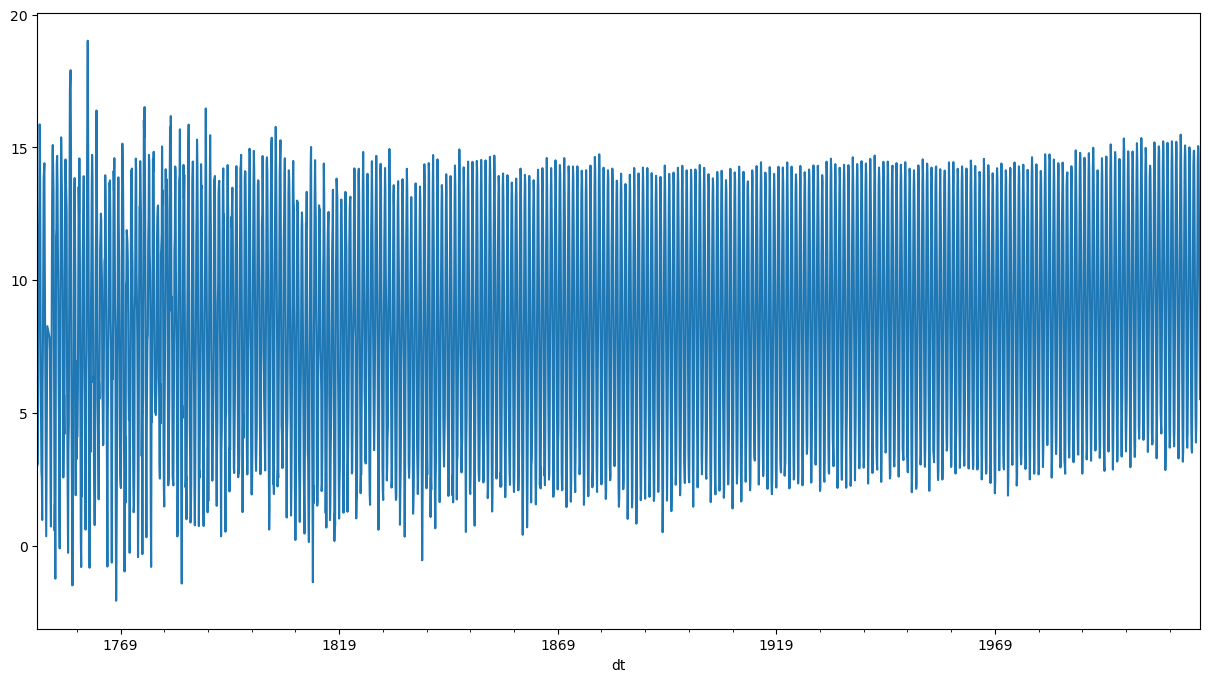

In [57]:
# Plot the 'LandAverageTemperature' column from the DataFrame
# Set the figure size to (15, 8) for better visualization
df.LandAverageTemperature.plot(figsize=(15, 8));

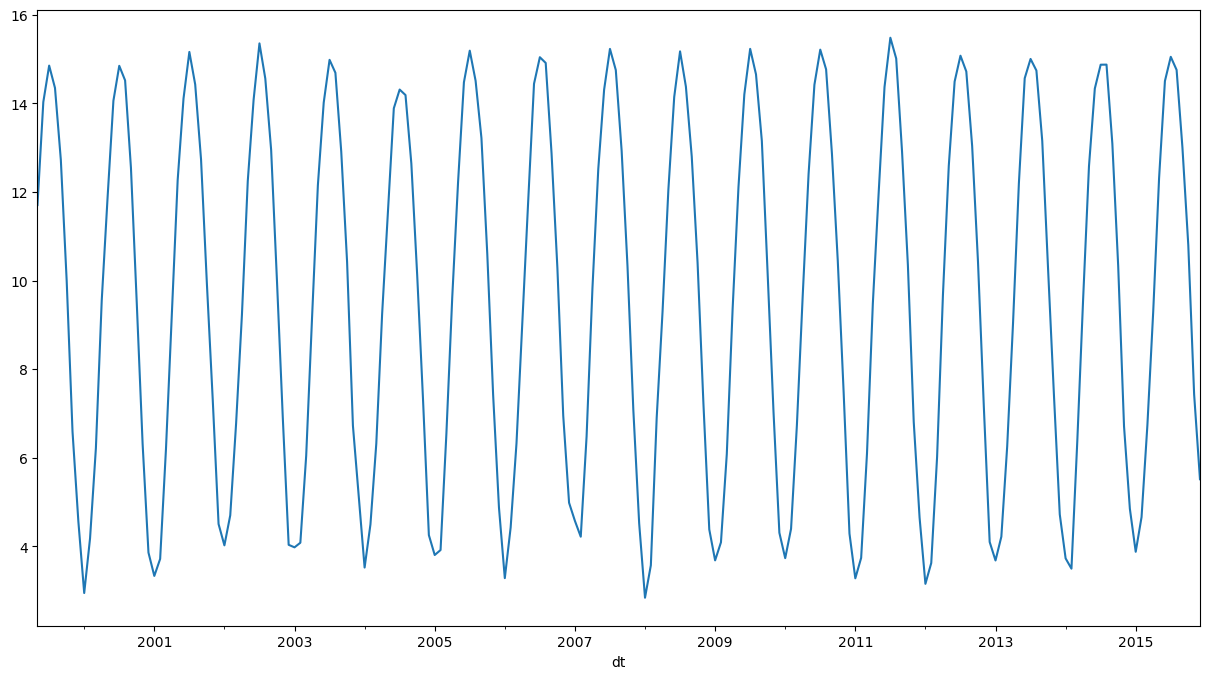

In [58]:
# Plot the 'LandAverageTemperature' column from the last 200 rows of the DataFrame
# Set the figure size to (15, 8) for better visualization
df.LandAverageTemperature[-200:].plot(figsize=(15, 8));

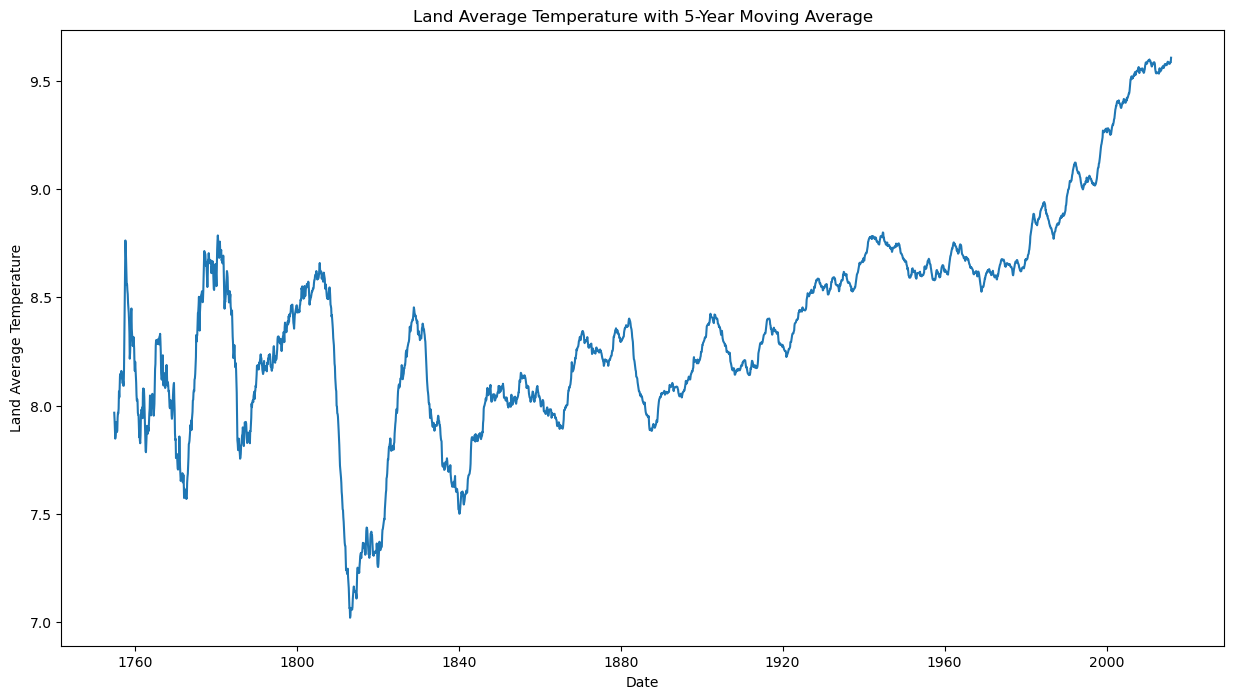

In [59]:
# Set the figure size for the plot
plt.figure(figsize=(15, 8))

# Calculate the 5-year rolling mean
rolling_mean = df['LandAverageTemperature'].rolling(window=60).mean()

# Plot the 5-year moving average
plt.plot(rolling_mean.index, rolling_mean, label='5-Year Moving Average')

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Land Average Temperature')
plt.title('Land Average Temperature with 5-Year Moving Average')

# Display the plot
plt.show()

In [60]:
# Print the index of the lowest value
print("Index of the lowest value:", rolling_mean.idxmin())

Index of the lowest value: 1813-03-01 00:00:00


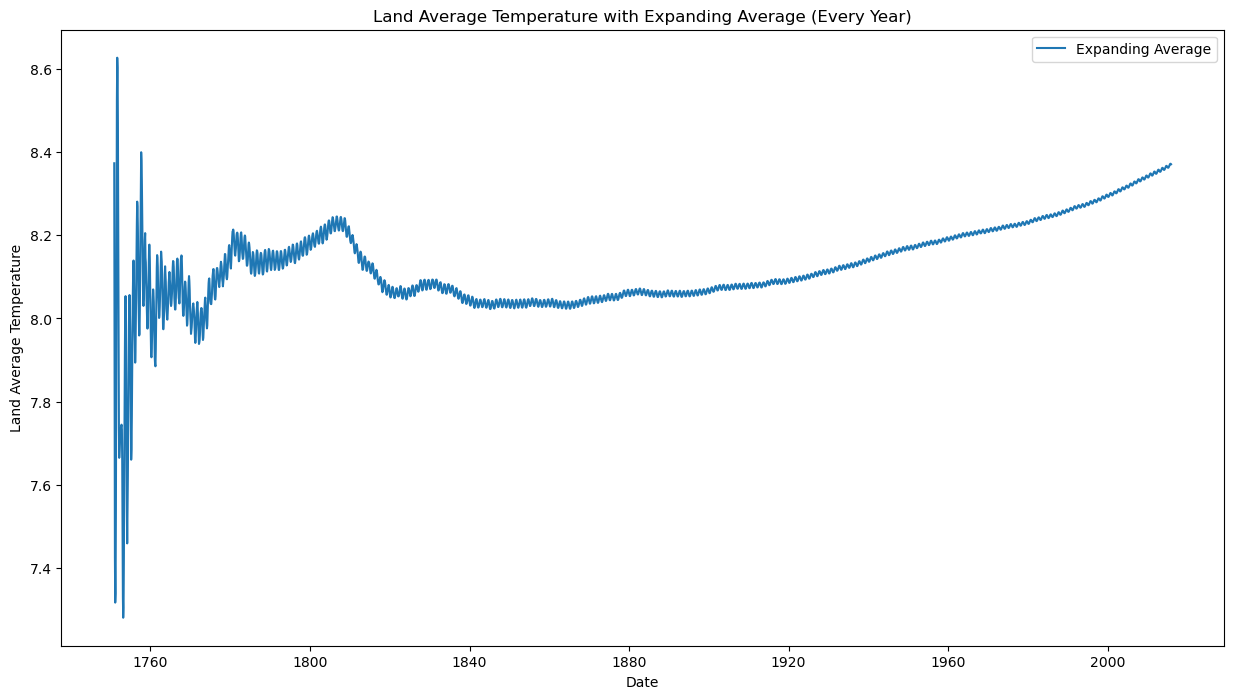

In [61]:
# Compute the expanding mean (cumulative mean) with a minimum number of observations equal to 12 months (1 year)
expanding_mean = df['LandAverageTemperature'].expanding(12).mean()
# Plot the expanding mean
plt.figure(figsize=(15, 8))
plt.plot(expanding_mean.index, expanding_mean, label='Expanding Average')
plt.xlabel('Date')
plt.ylabel('Land Average Temperature')
plt.title('Land Average Temperature with Expanding Average (Every Year)')
plt.legend()
plt.show()

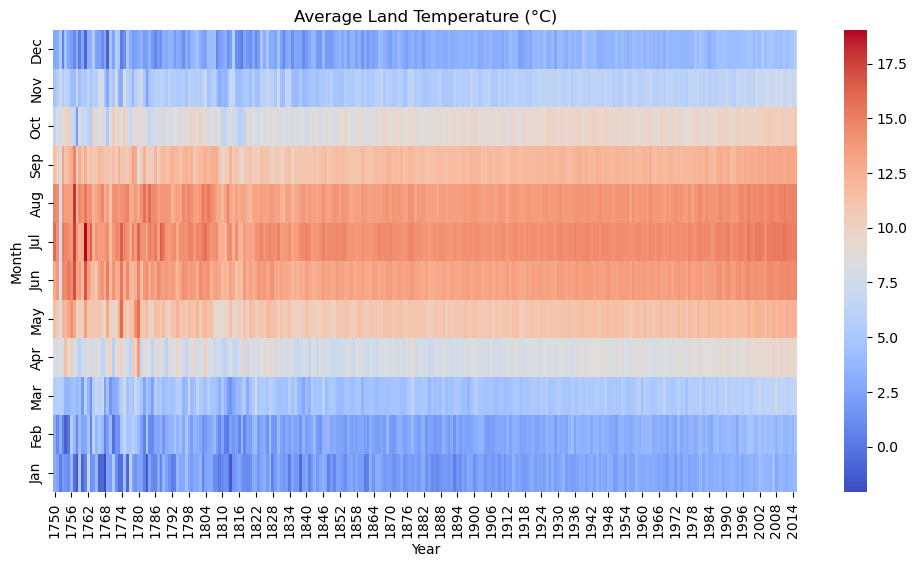

In [62]:
# Add 'Year' and 'Month' columns to the DataFrame
df['Year'] = df.index.year
df['Month'] = df.index.month

# Pivot the DataFrame to have years as columns and months as rows
pivot_df = df.pivot_table(index='Month', columns='Year', values='LandAverageTemperature')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df[::-1], cmap='coolwarm', annot=False, yticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][::-1])
plt.title('Average Land Temperature (°C)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

# Drop the 'Year' and 'Month' columns from the DataFrame
df.drop('Year', axis=1, inplace=True)
df.drop('Month', axis=1, inplace=True)

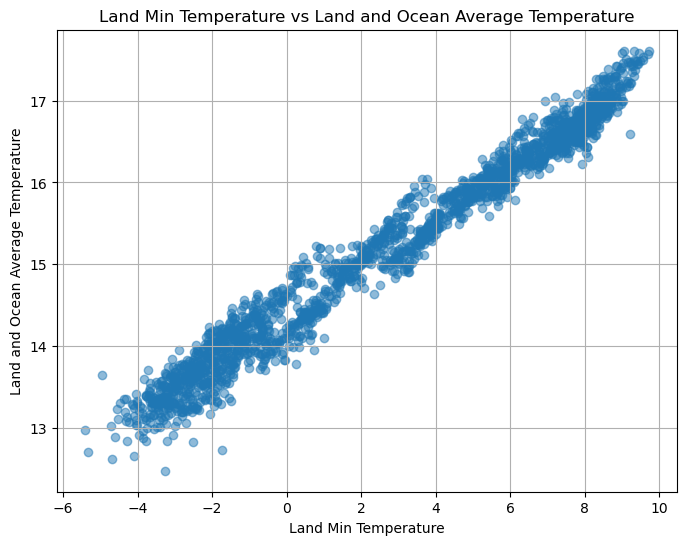

In [63]:
# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['LandMinTemperature'], df['LandAndOceanAverageTemperature'], alpha=0.5)
plt.title('Land Min Temperature vs Land and Ocean Average Temperature')
plt.xlabel('Land Min Temperature')
plt.ylabel('Land and Ocean Average Temperature')
plt.grid(True)
plt.show()

In [64]:
# Compute the correlation matrix for the DataFrame
df.corr()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
LandAverageTemperature,1.000000,0.995807,0.995611,0.988066
LandMaxTemperature,0.995807,1.000000,0.993404,0.983855
LandMinTemperature,0.995611,0.993404,1.000000,0.986402
LandAndOceanAverageTemperature,0.988066,0.983855,0.986402,1.000000


In [65]:
df.corr().sum()

LandAverageTemperature            3.979483
LandMaxTemperature                3.973066
LandMinTemperature                3.975416
LandAndOceanAverageTemperature    3.958323
dtype: float64

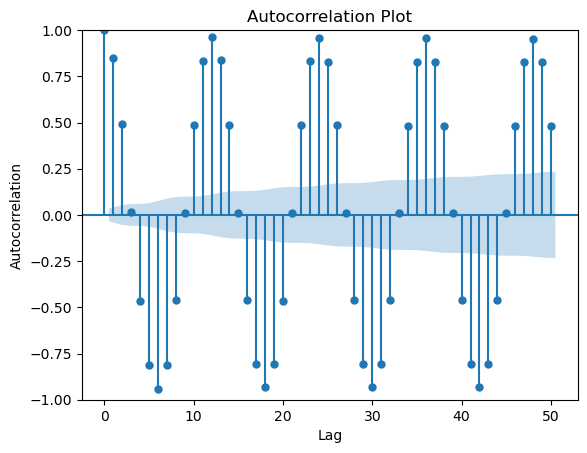

In [66]:
# Create autocorrelation plot
plot_acf(df.LandAverageTemperature, lags=50) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()

In [67]:
# Perform classical decomposition of the 'LandAverageTemperature' column
classical_decomposition = seasonal_decompose(df.LandAverageTemperature, model='additive', period=12)

# Extract components: trend, seasonal, and residual
classical_trend = classical_decomposition.trend
classical_seasonal = classical_decomposition.seasonal
classical_residual = classical_decomposition.resid

In [68]:
# Perform Seasonal-Trend decomposition using Loess (STL) on the 'LandAverageTemperature' column
stl = STL(df.LandAverageTemperature)

# Fit the STL decomposition model
stl_result = stl.fit()

# Extract components: trend, seasonal, and residual
stl_trend = stl_result.trend
stl_seasonal = stl_result.seasonal
stl_residual = stl_result.resid

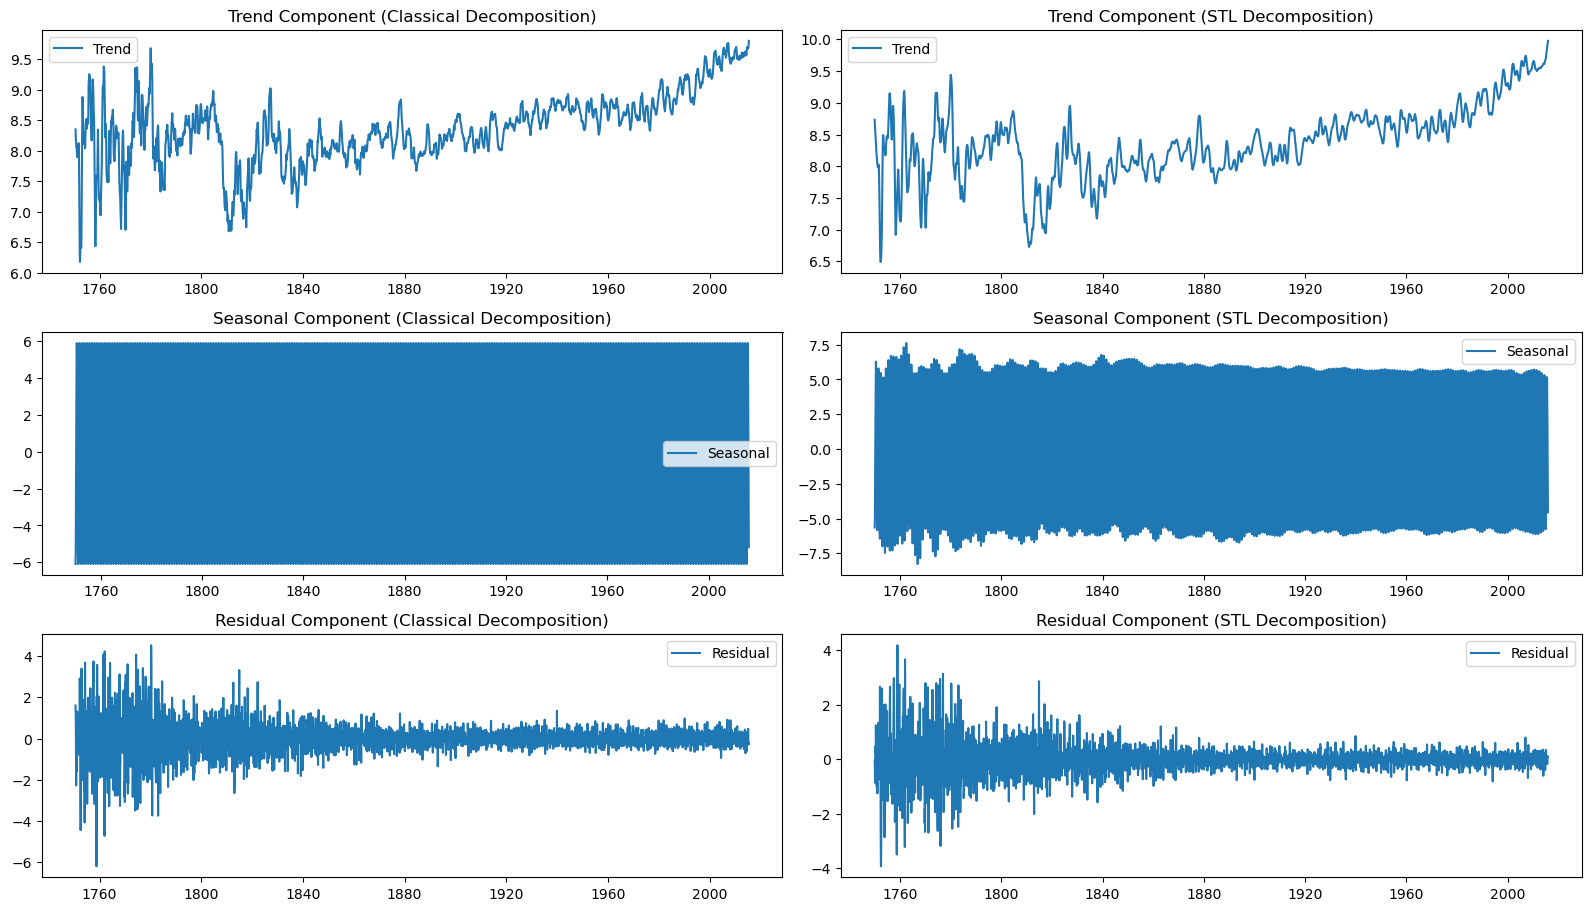

In [69]:
# Plotting
plt.figure(figsize=(16, 12))

# Classical Decomposition Components
plt.subplot(4, 2, 1)
plt.plot(df.index, classical_trend, label='Trend')
plt.title('Trend Component (Classical Decomposition)')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(df.index, classical_seasonal, label='Seasonal')
plt.title('Seasonal Component (Classical Decomposition)')
plt.legend()

plt.subplot(4, 2, 5)
plt.plot(df.index, classical_residual, label='Residual')
plt.title('Residual Component (Classical Decomposition)')
plt.legend()

# STL Decomposition Components
plt.subplot(4, 2, 2)
plt.plot(df.index, stl_trend, label='Trend')
plt.title('Trend Component (STL Decomposition)')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(df.index, stl_seasonal, label='Seasonal')
plt.title('Seasonal Component (STL Decomposition)')
plt.legend()

plt.subplot(4, 2, 6)
plt.plot(df.index, stl_residual, label='Residual')
plt.title('Residual Component (STL Decomposition)')
plt.legend()

plt.tight_layout()
plt.show()

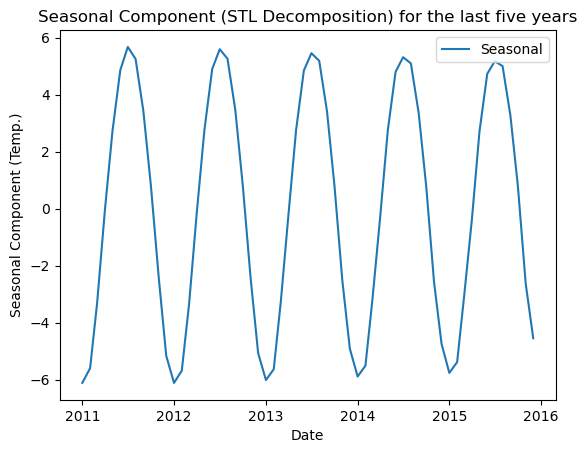

In [70]:
# Plot the seasonal component (STL Decomposition) for the last five years
plt.plot(df.index[-60:], stl_seasonal[-60:], label='Seasonal')
plt.title('Seasonal Component (STL Decomposition) for the last five years')
plt.xlabel('Date')
plt.ylabel('Seasonal Component (Temp.)')
plt.legend()
plt.show()

In [71]:
def check_stationarity(data):
    # Perform ADF test
    adf_result = adfuller(data)
    adf_statistic = adf_result[0]
    adf_p_value = adf_result[1]

    # Print results
    print("ADF Test:")
    print("ADF Statistic:", adf_statistic)
    print("p-value:", adf_p_value)
    if adf_p_value < 0.05:
        print("ADF Test Result: Data is stationary\n")
    else:
        print("ADF Test Result: Data is non-stationary\n")

In [72]:
check_stationarity(df.LandAverageTemperature)

ADF Test:
ADF Statistic: -4.036404455257107
p-value: 0.0012314360000813917
ADF Test Result: Data is stationary



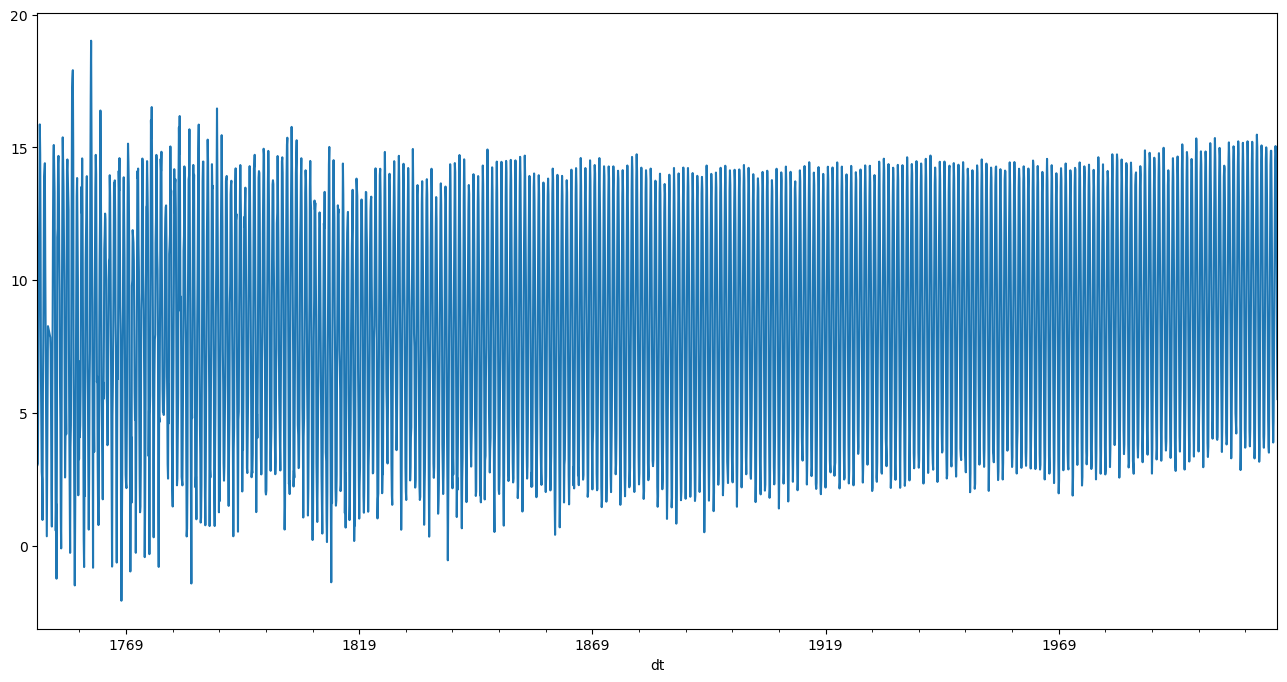

In [73]:
df.LandAverageTemperature.plot(figsize=(16, 8));

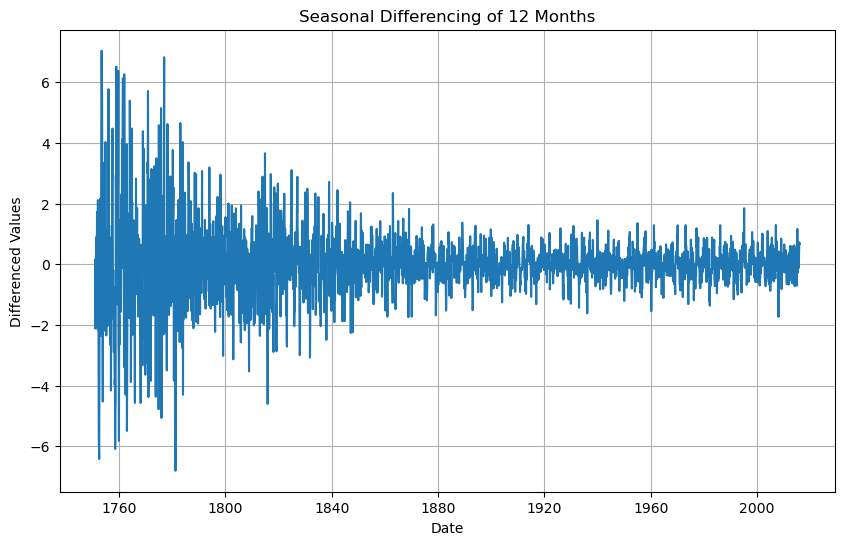

In [74]:
# Compute seasonal differencing of 12 months for the 'LandAverageTemperature' column
seasonal_diff = df.LandAverageTemperature.diff(12)

# Plot the differenced column
plt.figure(figsize=(10, 6))
plt.plot(seasonal_diff)
plt.title('Seasonal Differencing of 12 Months')
plt.xlabel('Date')
plt.ylabel('Differenced Values')
plt.grid(True)
plt.show()

In [75]:
check_stationarity(seasonal_diff.dropna())

ADF Test:
ADF Statistic: -12.31303284653747
p-value: 7.02165736425797e-23
ADF Test Result: Data is stationary



In [76]:
# Compute the absolute minimum value of the seasonal differenced data
add_value = round(abs(seasonal_diff.min()))

# Print the value to be subtracted after developing the model
print(f"This value has to be subtracted after developing our model = {add_value}")

# Add the absolute minimum value to the seasonal differenced data
seasonal_diff += add_value

This value has to be subtracted after developing our model = 7


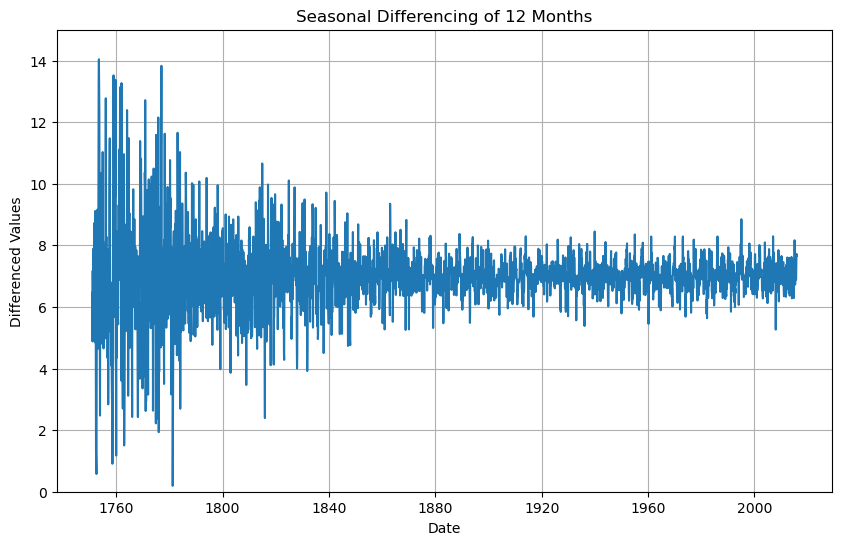

In [77]:
# Plot the differenced column with adjusted y-axis limits
plt.figure(figsize=(10, 6))
plt.plot(seasonal_diff)
plt.title('Seasonal Differencing of 12 Months')
plt.xlabel('Date')
plt.ylabel('Differenced Values')
plt.grid(True)
plt.ylim([0, 15])  # Adjust y-axis limits for better visualization
plt.show()

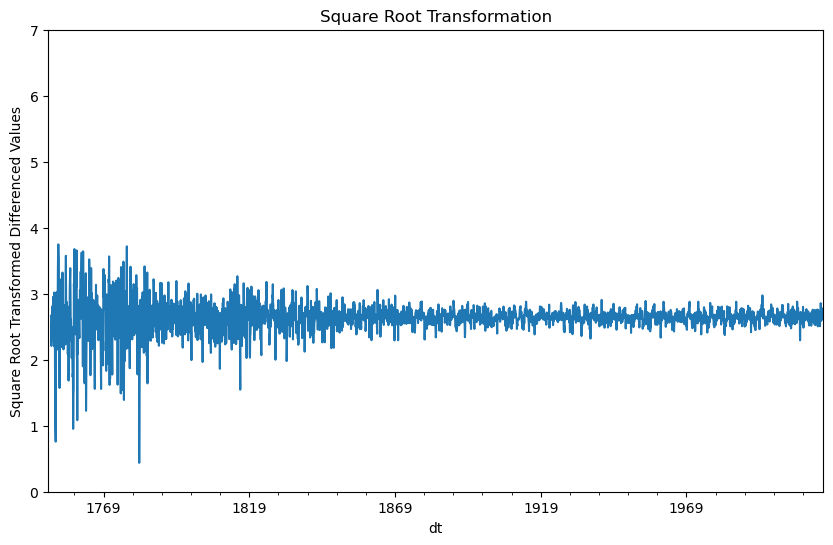

In [78]:
# Apply square root transformation to the seasonal differenced data
df_cube = np.power(seasonal_diff, 1/2)

# Plot the transformed data
df_cube.plot(ylabel="Square Root Transformed Differenced Values", legend=False, figsize=(10, 6))
plt.ylim([0, 7])  # Adjust y-axis limits for better visualization
plt.title('Square Root Transformation')
plt.show()

In [79]:
class TSMean:
    def __init__(self, series):
        """
        Initialize TSMean with the given time series.

        Parameters:
        series (pandas Series): Time series data.
        """
        # Calculate the mean of the series
        self.mean = series.mean()

    def forecast(self, steps):
        """
        Generate forecasts using the mean value.

        Parameters:
        steps (int): Number of steps to forecast.

        Returns:
        list: List of forecasted values.
        """
        # Return a list containing the mean value repeated for the specified number of steps
        return [self.mean] * steps
    
class TSNaive:
    def __init__(self, series):
        """
        Initialize TSNaive with the given time series.

        Parameters:
        series (pandas Series): Time series data.
        """
        # Store the last observed value of the series
        self.last_value = series.iloc[-1]

    def fit(self):
        """
        Fit the model (no action needed for naive method).

        Returns:
        self: Returns self.
        """
        return self

    def forecast(self, steps):
        """
        Generate forecasts using the last observed value.

        Parameters:
        steps (int): Number of steps to forecast.

        Returns:
        list: List of forecasted values.
        """
        # Return a list containing the last observed value repeated for the specified number of steps
        return [self.last_value] * steps
    
class TSNaiveSeasonal:
    def __init__(self, series, period):
        """
        Initialize TSNaiveSeasonal with the given time series and seasonal period.

        Parameters:
        series (pandas Series): Time series data.
        period (int): Seasonal period of the time series.
        """
        # Store the seasonal period and values of the series
        self.period = period
        self.values = series.values

    def forecast(self, steps):
        """
        Generate seasonal naive forecasts.

        Parameters:
        steps (int): Number of steps to forecast.

        Returns:
        list: List of forecasted values.
        """
        # Generate forecasts by repeating the last observed value from the corresponding season
        seasonal_forecast = []
        for i in range(steps):
            index = len(self.values) - (i % self.period) - 1
            seasonal_forecast.append(self.values[index])
        return seasonal_forecast[::-1]
    
class TSDrift:
    def __init__(self, series):
        """
        Initialize TSDrift with the given time series.

        Parameters:
        series (pandas Series): Time series data.
        """
        # Calculate the linear regression parameters
        self.x_start = 0
        self.x_end = len(series) - 1
        self.y_start = series.iloc[0]
        self.y_end = series.iloc[-1]
        self.slope = (self.y_end - self.y_start) / (self.x_end - self.x_start)
        self.intercept = self.y_start - self.slope * self.x_start

    def forecast(self, steps):
        """
        Generate forecasts using the linear regression (drift) method.

        Parameters:
        steps (int): Number of steps to forecast.

        Returns:
        list: List of forecasted values.
        """
        # Generate forecasts by extending the linear regression line into the future
        forecast_values = [self.intercept + self.slope * (self.x_end + i) for i in range(1, steps + 1)]
        return forecast_values

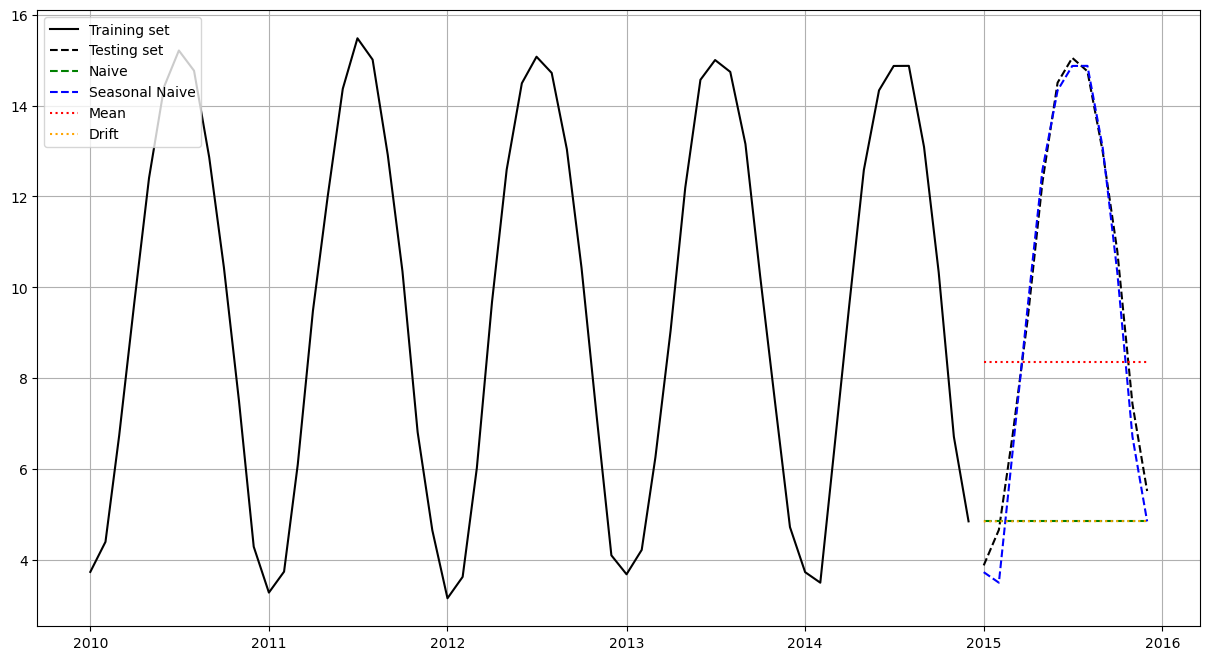

In [80]:
# Make all data as training except the last year as testing
Train = df['LandAverageTemperature'][:-12]
Test = df['LandAverageTemperature'][-12:]
m = TSMean(Train)
n = TSNaive(Train).fit()
s = TSNaiveSeasonal(Train, 12)
dr = TSDrift(Train)

# Calculate forecasted values
forecast_naive = n.forecast(12)
forecast_seasonal = s.forecast(12)
forecast_mean = m.forecast(12)
forecast_drift = dr.forecast(12)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(Train[-60:], 'k', label='Training set')
ax.plot(Test, 'k', linestyle='--', label='Testing set')
ax.plot(Test.index, forecast_naive, color='green', label='Naive', linestyle='--')
ax.plot(Test.index, forecast_seasonal, color='blue', label='Seasonal Naive', linestyle='--')
ax.plot(Test.index, forecast_mean, color='red', label='Mean', linestyle='dotted')
ax.plot(Test.index, forecast_drift, color='orange', label='Drift', linestyle=':')
ax.legend(loc='upper left')
ax.grid()
plt.show()

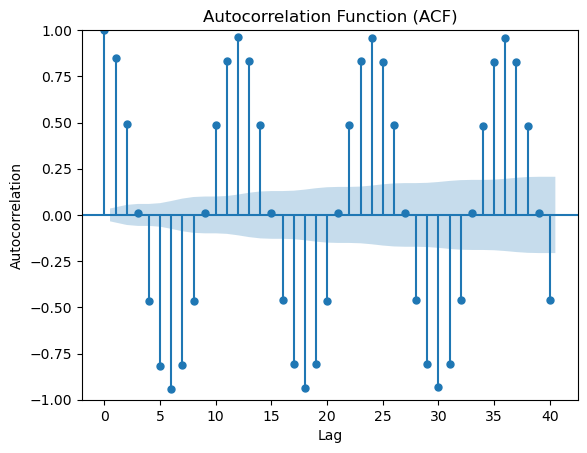

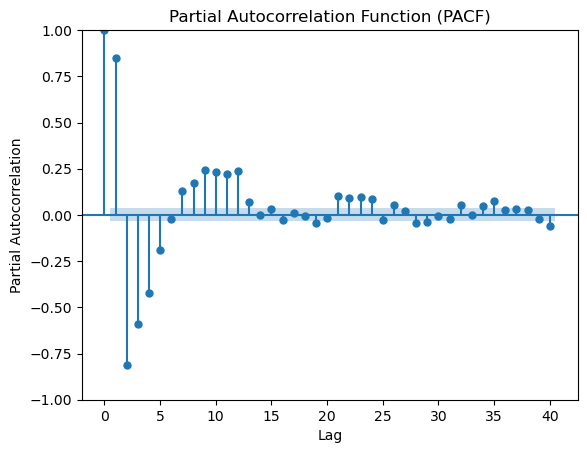

In [81]:
# Plot ACF
plot_acf(Train, lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plot_pacf(Train, lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [82]:
# Print information about the data
print('Observations: {}'.format(len(df)))
print('Training Observations: {}'.format(len(Train)))
print('Testing Observations: {}'.format(len(Test)))

Observations: 3192
Training Observations: 3180
Testing Observations: 12


In [83]:
# Calculate RMSE, MAE, MAPE for each model
def calculate_metrics(true_values, forecasted_values):
    rmse = np.sqrt(mean_squared_error(true_values, forecasted_values))
    mae = mean_absolute_error(true_values, forecasted_values)
    mape = np.mean(np.abs((true_values - forecasted_values) / true_values)) * 100
    return [rmse, mae, mape]

In [84]:
naive_metrics = calculate_metrics(Test, forecast_naive)
seasonal_metrics = calculate_metrics(Test, forecast_seasonal)
mean_metrics = calculate_metrics(Test, forecast_mean)
drift_metrics = calculate_metrics(Test, forecast_drift)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['Naive', 'Seasonal Naive', 'Mean', 'Drift'],
    'RMSE': [naive_metrics[0], seasonal_metrics[0], mean_metrics[0], drift_metrics[0]],
    'MAE': [naive_metrics[1], seasonal_metrics[1], mean_metrics[1], drift_metrics[1]],
    'MAPE (%)': [naive_metrics[2], seasonal_metrics[2], mean_metrics[2], drift_metrics[2]]
})
results.set_index('Model', inplace=True)
results

,RMSE,MAE,MAPE (%)
Model,,,
Naive,6.353953,5.173500,44.303238
Seasonal Naive,0.493890,0.386667,5.779383
Mean,4.208256,3.730714,42.804960
Drift,6.350677,5.170073,44.268544


In [85]:
# Train autoregression model
model = AutoReg(Train, lags=25)  # Create an autoregression model with 25 lags
model_fit = model.fit()  # Fit the autoregression model to the training data
print('Coefficients: %s' % model_fit.params)  # Print the coefficients of the fitted model

Coefficients: const                         0.876806
LandAverageTemperature.L1     0.411104
LandAverageTemperature.L2     0.093332
LandAverageTemperature.L3    -0.003108
LandAverageTemperature.L4    -0.093734
LandAverageTemperature.L5    -0.061780
LandAverageTemperature.L6    -0.037212
LandAverageTemperature.L7     0.034809
LandAverageTemperature.L8     0.004781
LandAverageTemperature.L9     0.042421
LandAverageTemperature.L10    0.044541
LandAverageTemperature.L11    0.042863
LandAverageTemperature.L12    0.166855
LandAverageTemperature.L13    0.055020
LandAverageTemperature.L14   -0.027795
LandAverageTemperature.L15    0.020577
LandAverageTemperature.L16   -0.033673
LandAverageTemperature.L17    0.026329
LandAverageTemperature.L18    0.030516
LandAverageTemperature.L19   -0.033004
LandAverageTemperature.L20   -0.069398
LandAverageTemperature.L21    0.046157
LandAverageTemperature.L22    0.050211
LandAverageTemperature.L23    0.075978
LandAverageTemperature.L24    0.116180
LandAverage

In [86]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              AutoReg Model Results                               
==================================================================================
Dep. Variable:     LandAverageTemperature   No. Observations:                 3180
Model:                        AutoReg(25)   Log Likelihood               -3728.951
Method:                   Conditional MLE   S.D. of innovations              0.789
Date:                    Thu, 04 Jul 2024   AIC                           7511.902
Time:                            18:00:27   BIC                           7675.434
Sample:                        02-01-1752   HQIC                          7570.573
                             - 12-01-2014                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.8768      0.225      3.899      0.000       0.436       1.318
LandAverageTemperature.L1      0.4111      0.018     23.115      0.000       0.376       0.446
LandAverageTemperature.L2      0.0933      0.019      4.881      0.000       0.056       0.131
LandAverageTemperature.L3     -0.0031      0.019     -0.162      0.871      -0.041       0.034
LandAverageTemperature.L4     -0.0937      0.019     -4.902      0.000      -0.131      -0.056
LandAverageTemperature.L5     -0.0618      0.019     -3.222      0.001      -0.099      -0.024
LandAverageTemperature.L6     -0.0372      0.019     -1.942      0.052      -0.075       0.000
LandAverageTemperature.L7      0.0348      0.019      1.816      0.069      -0.003       0.072
LandAverageTemperature.L8      0.0048      0.019      0.249      0.803      -0.033       0.042
LandAverageTemperature.L9      0.0424      0.019      2.214      0.027       0.005       0.080
LandAverageTemperature.L10     0.0445      0.019      2.324      0.020       0.007       0.082
LandAverageTemperature.L11     0.0429      0.019      2.236      0.025       0.005       0.080
LandAverageTemperature.L12     0.1669      0.019      8.713      0.000       0.129       0.204
LandAverageTemperature.L13     0.0550      0.019      2.844      0.004       0.017       0.093
LandAverageTemperature.L14    -0.0278      0.019     -1.452      0.147      -0.065       0.010
LandAverageTemperature.L15     0.0206      0.019      1.075      0.282      -0.017       0.058
LandAverageTemperature.L16    -0.0337      0.019     -1.763      0.078      -0.071       0.004
LandAverageTemperature.L17     0.0263      0.019      1.378      0.168      -0.011       0.064
LandAverageTemperature.L18     0.0305      0.019      1.597      0.110      -0.007       0.068
LandAverageTemperature.L19    -0.0330      0.019     -1.729      0.084      -0.070       0.004
LandAverageTemperature.L20    -0.0694      0.019     -3.638      0.000      -0.107      -0.032
LandAverageTemperature.L21     0.0462      0.019      2.419      0.016       0.009       0.084
LandAverageTemperature.L22     0.0502      0.019      2.639      0.008       0.013       0.088
LandAverageTemperature.L23     0.0760      0.019      3.989      0.000       0.039       0.113
LandAverageTemperature.L24     0.1162      0.019      6.106      0.000       0.079       0.153
LandAverageTemperature.L25    -0.0062      0.018     -0.351      0.725      -0.041       0.029
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0108           -0.0000j            1.0108           -0.0000
AR.2             0.8664           -0.5002j            1

predicted=3.584026, expected=3.881000
predicted=3.987677, expected=4.664000
predicted=6.066426, expected=6.740000
predicted=8.998405, expected=9.313000
predicted=11.971297, expected=12.312000
predicted=14.202456, expected=14.505000
predicted=15.060609, expected=15.051000
predicted=14.581836, expected=14.755000
predicted=12.772302, expected=12.999000
predicted=10.029432, expected=10.801000
predicted=6.929647, expected=7.433000
predicted=4.509102, expected=5.518000


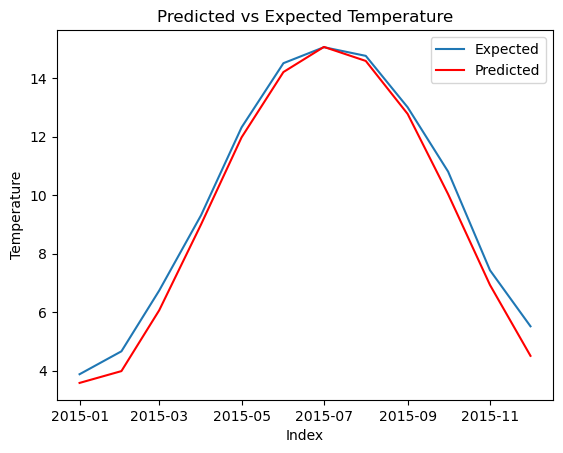

In [87]:
# Make predictions using the fitted model
predictions = model_fit.predict(start=len(Train), end=len(Train)+len(Test)-1, dynamic=False).values

# Print predicted and expected values
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], Test.iloc[i]))

# Plot predictions vs expected
plt.plot(Test.index, Test, label='Expected')
plt.plot(Test.index, predictions, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Predicted vs Expected Temperature')
plt.legend();

In [88]:
# Calculate metrics for the predictions
metrics = calculate_metrics(Test, predictions)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Autoregression'] = metrics_df.values[0]

In [89]:
results

,RMSE,MAE,MAPE (%)
Model,,,
Naive,6.353953,5.173500,44.303238
Seasonal Naive,0.493890,0.386667,5.779383
Mean,4.208256,3.730714,42.804960
Drift,6.350677,5.170073,44.268544
Autoregression,0.520730,0.441500,6.296515


In [90]:
# calculate residuals
# Predict values for the training set using the fitted autoregression model
# Start predicting from the 26th observation (lags = 25) to the end of the training set
predictions_train = model_fit.predict(start=25, end=len(Train), dynamic=False).values

# Extract the actual values of the training set starting from the 26th observation
Train_mod = Train[25:].values

# Calculate residuals by subtracting predicted values from actual values for each corresponding observation
train_resid = [Train_mod[i] - predictions_train[i] for i in range(len(Train_mod))]

In [91]:
model_ma = AutoReg(train_resid, lags=200) 
model_fit_ma = model_ma.fit()
print('Coefficients: %s' % model_fit_ma.params)

Coefficients: [ 0.00461848 -0.09922539 -0.0429777  -0.0452628   0.07763753  0.08475998
  0.07003994  0.06240153  0.03999904  0.01982898 -0.0099651  -0.03878231
 -0.06668526 -0.05958852 -0.01963391 -0.03636062  0.05817912  0.05397585
  0.06344138  0.08811494  0.05622383 -0.01177456 -0.03005041 -0.10091553
 -0.14839411 -0.1772951  -0.04573118  0.06396265  0.07441556  0.07849879
  0.1118253   0.02227826  0.0408699  -0.02421332 -0.03701082 -0.01657622
 -0.1077223  -0.05130641 -0.02298814  0.03133612  0.05790584  0.06096486
  0.07281478  0.08077764  0.00881252 -0.00341628 -0.05753057 -0.03230168
 -0.03311267 -0.05144981  0.01453289  0.00559643  0.00748474  0.01309961
  0.01162401  0.01730475 -0.00844928  0.00807704 -0.02060711 -0.03045837
 -0.00532021  0.00707076  0.0010906   0.01403585  0.02562718  0.04063333
  0.03156098 -0.0257982  -0.00178792 -0.00634456 -0.03296037 -0.00277693
  0.02408185  0.02093728  0.03993165 -0.00390417 -0.02267736 -0.00037457
  0.01653545  0.02718261 -0.0045517  

In [92]:
model_fit_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 3155
Model:                   AutoReg(200)   Log Likelihood               -2701.713
Method:               Conditional MLE   S.D. of innovations              0.604
Date:                Thu, 04 Jul 2024   AIC                           5807.427
Time:                        18:00:28   BIC                           7017.660
Sample:                           200   HQIC                          6243.079
                                 3155                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0046      0.011      0.414      0.679      -0.017       0.027
y.L1          -0.0992      0.018     -5.395      0.000      -0.135      -0.063
y.L2          -0.0430      0.018     -2.328      0.020      -0.079      -0.007
y.L3          -0.0453      0.018     -2.450      0.014      -0.081      -0.009
y.L4           0.0776      0.018      4.203      0.000       0.041       0.114
y.L5           0.0848      0.018      4.600      0.000       0.049       0.121
y.L6           0.0700      0.018      3.790      0.000       0.034       0.106
y.L7           0.0624      0.018      3.375      0.001       0.026       0.099
y.L8           0.0400      0.019      2.161      0.031       0.004       0.076
y.L9           0.0198      0.018      1.077      0.282      -0.016       0.056
y.L10         -0.0100      0.018     -0.543      0.587      -0.046       0.026
y.L11         -0.0388      0.018     -2.114      0.035      -0.075      -0.003
y.L12         -0.0667      0.018     -3.633      0.000      -0.103      -0.031
y.L13         -0.0596      0.018     -3.239      0.001      -0.096      -0.024
y.L14         -0.0196      0.018     -1.066      0.286      -0.056       0.016
y.L15         -0.0364      0.018     -1.976      0.048      -0.072      -0.000
y.L16          0.0582      0.018      3.164      0.002       0.022       0.094
y.L17          0.0540      0.018      2.932      0.003       0.018       0.090
y.L18          0.0634      0.018      3.452      0.001       0.027       0.099
y.L19          0.0881      0.018      4.786      0.000       0.052       0.124
y.L20          0.0562      0.018      3.045      0.002       0.020       0.092
y.L21         -0.0118      0.018     -0.639      0.523      -0.048       0.024
y.L22         -0.0301      0.018     -1.636      0.102      -0.066       0.006
y.L23         -0.1009      0.018     -5.495      0.000      -0.137      -0.065
y.L24         -0.1484      0.018     -8.044      0.000      -0.185      -0.112
y.L25         -0.1773      0.019     -9.526      0.000      -0.214      -0.141
y.L26         -0.0457      0.019     -2.421      0.015      -0.083      -0.009
y.L27          0.0640      0.019      3.384      0.001       0.027       0.101
y.L28          0.0744      0.019      3.931      0.000       0.037       0.112
y.L29          0.0785      0.019      4.139      0.000       0.041       0.116
y.L30          0.1118      0.019      5.885      0.000       0.075       0.149
y.L31          0.0223      0.019      1.166      0.244      -0.015       0.060
y.L32          0.0409      0.019      2.140      0.032       0.003       0.078
y.L33         -0.0242      0.019     -1.271      0.204      -0.062       0.013
y.L34         -0.0370      0.019     -1.945      0.052      -0.074       0.000
y.L35         -0.0166      0.019     -0.870      0.384      -0.054       0.021
y.L36         -0.1077      0.019     -5.655      0.000      -0.145      -0.070
y.L37         -0.0513      0.019     -2.680      0.007      -0.089      -0.014
y.

predicted=0.206272, expected=0.296974
predicted=0.230474, expected=0.676323
predicted=0.167612, expected=0.673574
predicted=0.048723, expected=0.314595
predicted=-0.045586, expected=0.340703
predicted=0.008407, expected=0.302544
predicted=0.184184, expected=-0.009609
predicted=0.060265, expected=0.173164
predicted=0.129564, expected=0.226698
predicted=0.233303, expected=0.771568
predicted=-0.136446, expected=0.503353
predicted=0.121002, expected=1.008898


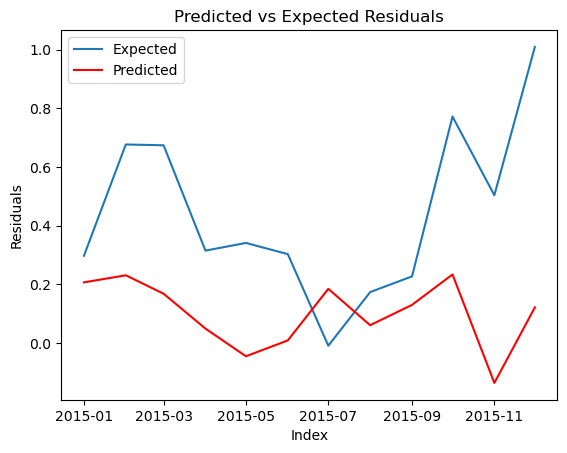

In [93]:
# Make predictions using the fitted model
predictions_ma = model_fit_ma.predict(start=len(train_resid), end=len(train_resid)+len(Test)-1, dynamic=False)

# Print predicted and expected values
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions_ma[i], Test.iloc[i]-predictions[i]))

# Calculate and print Root Mean Squared Error (RMSE) for the predictions
# rmse = sqrt(mean_squared_error(test.values, predictions_ma))
# print('Test RMSE: %.3f' % rmse)

# Plot predictions vs expected
plt.plot(Test.index, Test - predictions, label='Expected')
plt.plot(Test.index, predictions_ma, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Predicted vs Expected Residuals')
plt.legend();

In [94]:
predictions_sum = [x + y for x, y in zip(predictions, predictions_ma)]
# Calculate metrics for the predictions
metrics = calculate_metrics(Test, predictions_sum)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['AR+MA'] = metrics_df.values[0]

In [95]:
results

,RMSE,MAE,MAPE (%)
Model,,,
Naive,6.353953,5.173500,44.303238
Seasonal Naive,0.493890,0.386667,5.779383
Mean,4.208256,3.730714,42.804960
Drift,6.350677,5.170073,44.268544
Autoregression,0.520730,0.441500,6.296515
AR+MA,0.439374,0.371550,4.992116


In [97]:
# Automatically search for the best ARIMA model parameters using auto_arima function
seed = 42
auto_arima_model = auto_arima(Train, start_p=1, start_q=1,
                              max_p=30, max_q=30, m=1,
                              seasonal=False,
                              d=None, trace=True,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True,
                              random_state=seed)

# Print the best parameters found by auto_arima
print("Best parameters found by auto_arima:", auto_arima_model.order)

# Create an ARIMA model with the best parameters obtained from auto_arima
model_arima = ARIMA(Train, order=auto_arima_model.order)

# Fit the ARIMA model to the training data
arima_fit = model_arima.fit()

# Akaike Information Criterion (AIC) is a metric used to evaluate the goodness of fit of a statistical model while penalizing for the number of parameters in the model. 
# The lower the AIC value, the better the model is considered to be.
# "intercept" refers to an additional parameter in the model equation that represents a constant term or a baseline level. Including an intercept term allows the model to capture any systematic offset or bias in the data that is not explained by the autoregressive (AR), differencing (I), and moving average (MA) components.

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12627.030, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14602.073, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12635.431, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13327.495, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14600.074, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12628.095, Time=0.69 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.85 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12676.542, Time=0.47 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12613.380, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11832.590, Time=0.30 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=10777.863, Time=0.45 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=10002.850, Time=0.54 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=8263.581, Time=3.05 sec
 ARIMA(4,1,1)(0,0,0)[0] intercep

### The Akaike Information Criterion (AIC):
is a measure of the relative quality of statistical models for a given set of data. It was developed by the Japanese statistician Hirotugu Akaike in 1973.

__Purpose:__
The primary purpose of the AIC is to balance the goodness of fit of a model with its simplicity or complexity. It provides a way to compare different models fitted to the same dataset, considering both the goodness of fit and the number of parameters used in the model.

__Calculation:__
The AIC is calculated using the formula:

$$
AIC = −2×ln(𝐿) + 2×𝑘
$$

Where:
- 𝐿: is the likelihood of the model given the data.
- 𝑘: is the number of parameters in the model.

__Interpretation:__
- Lower AIC values: Models with lower AIC values are considered to have better balance between goodness of fit and simplicity. They are preferred over models with higher AIC values.
- Higher AIC values: Models with higher AIC values are considered to be less parsimonious or overly complex, and they may overfit the data.

__Usage:__
- The AIC is commonly used for model selection, especially in cases where multiple models are fitted to the same dataset. The model with the lowest AIC value is usually selected as the preferred model.
- AIC can be used to compare different models fitted to the same dataset, allowing researchers to choose the most appropriate model based on both fit and complexity.

In [99]:
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     LandAverageTemperature   No. Observations:                 3180
Model:                    ARIMA(13, 1, 4)   Log Likelihood               -3851.258
Date:                    Thu, 04 Jul 2024   AIC                           7738.516
Time:                            18:05:26   BIC                           7847.673
Sample:                        01-01-1750   HQIC                          7777.664
                             - 12-01-2014                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4045      0.285     -1.421      0.155      -0.962       0.153
ar.L2          0.3535      0.194      1.825      0.068      -0.026       0.733
ar.L3          0.0896      0.240      0.374      0.708      -0.380       0.560
ar.L4         -0.8266      0.177     -4.675      0.000      -1.173      -0.480
ar.L5         -0.4894      0.104     -4.706      0.000      -0.693      -0.286
ar.L6         -0.3085      0.067     -4.574      0.000      -0.441      -0.176
ar.L7         -0.2264      0.044     -5.097      0.000      -0.313      -0.139
ar.L8         -0.2702      0.041     -6.656      0.000      -0.350      -0.191
ar.L9         -0.2226      0.057     -3.931      0.000      -0.334      -0.112
ar.L10        -0.1586      0.037     -4.240      0.000      -0.232      -0.085
ar.L11        -0.1294      0.020     -6.511      0.000      -0.168      -0.090
ar.L12        -0.1030      0.032     -3.237      0.001      -0.165      -0.041
ar.L13        -0.0147      0.018     -0.837      0.403      -0.049       0.020
ma.L1         -0.1705      0.284     -0.600      0.549      -0.728       0.387
ma.L2         -0.6890      0.296     -2.324      0.020      -1.270      -0.108
ma.L3         -0.0305      0.323     -0.094      0.925      -0.664       0.603
ma.L4          0.7917      0.276      2.867      0.004       0.250       1.333
sigma2         0.6724      0.009     75.720      0.000       0.655       0.690
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):              6188.57
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

predicted=3.795818, expected=3.881000
predicted=4.345420, expected=4.664000
predicted=6.289851, expected=6.740000
predicted=9.085484, expected=9.313000
predicted=12.029391, expected=12.312000
predicted=14.305191, expected=14.505000
predicted=15.340280, expected=15.051000
predicted=14.766069, expected=14.755000
predicted=12.856721, expected=12.999000
predicted=10.054652, expected=10.801000
predicted=7.124750, expected=7.433000
predicted=4.853614, expected=5.518000


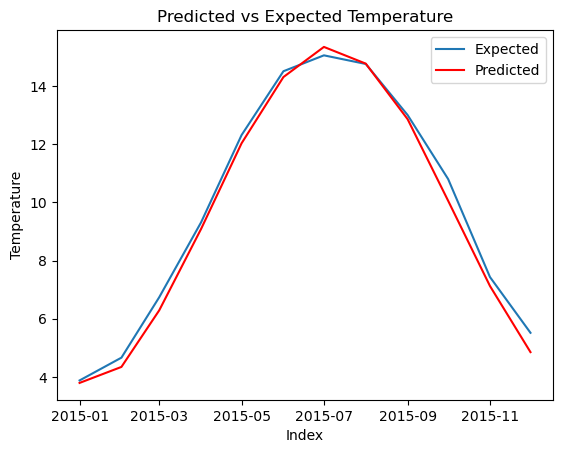

In [127]:
# Make predictions using the fitted model
predictions = arima_fit.predict(start=len(Train), end=len(Train)+len(Test)-1, dynamic=False).values

# Print predicted and expected values
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], Test.iloc[i]))

# Plot predictions vs expected
plt.plot(Test.index, Test, label='Expected')
plt.plot(Test.index, predictions, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Predicted vs Expected Temperature')
plt.legend();

In [103]:
# Calculate metrics for the predictions
metrics = calculate_metrics(Test, predictions)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['ARIMA'] = metrics_df.values[0]

In [105]:
results

,RMSE,MAE,MAPE (%)
Model,,,
Naive,6.353953,5.173500,44.303238
Seasonal Naive,0.493890,0.386667,5.779383
Mean,4.208256,3.730714,42.804960
Drift,6.350677,5.170073,44.268544
Autoregression,0.520730,0.441500,6.296515
AR+MA,0.439374,0.371550,4.992116
ARIMA,0.374216,0.310455,4.000755


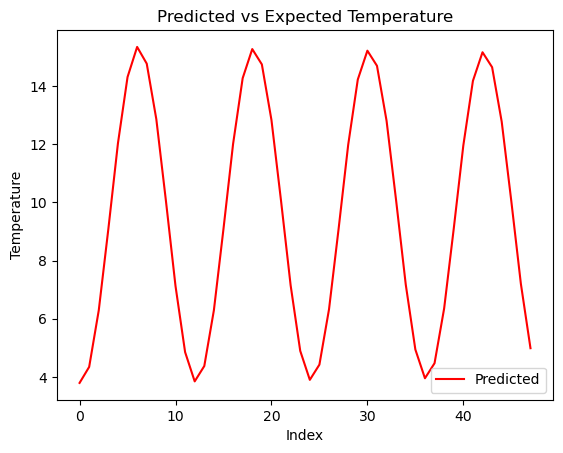

In [107]:
# Make predictions using the fitted model
predictions = arima_fit.predict(start=len(Train), end=len(Train)+len(Test)-1+36, dynamic=False).values

# Plot predictions vs expected
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Predicted vs Expected Temperature')
plt.legend();

### Seasonal Autoregressive Integrated Moving Average (SARIMA) model 
It is an extension of the Autoregressive Integrated Moving Average (ARIMA) model that includes __seasonality__. It is used for time series forecasting and can capture both __non-seasonal__ and __seasonal__ patterns in the data.

__Components of SARIMA Model:__
- Seasonal Autoregressive (SAR) terms: These terms capture the linear relationship between the observations at current and previous seasonal time points.

- Seasonal Integrated (SI) term: This term represents the seasonal differencing of the time series data to make it stationary.

- Seasonal Moving Average (SMA) terms: These terms capture the linear relationship between the error terms at current and previous seasonal time points.

- Autoregressive (AR) terms: These terms capture the linear relationship between the observations at current and previous non-seasonal time points.

- Integrated (I) term: This term represents the differencing of the time series data to make it stationary.

- Moving Average (MA) terms: These terms capture the linear relationship between the error terms at current and previous non-seasonal time points.

__Parameters of SARIMA Model SARIMA(p,d,q)(P,D,Q)[m]:__
- 𝑝: Number of autoregressive (AR) terms.
- 𝑑: Degree of differencing (non-seasonal).
- 𝑞: Number of moving average (MA) terms.
- 𝑃: Number of seasonal autoregressive (SAR) terms.
- 𝐷: Degree of seasonal differencing.
- 𝑄: Number of seasonal moving average (SMA) terms.
- 𝑚: Seasonal period.

_Advantages of SARIMA Model:_
- Can capture both non-seasonal and seasonal patterns in the data.
- Provides accurate forecasts for time series data with complex patterns.

__Limitations of SARIMA Model:__
- Requires careful identification of model parameters, which can be time-consuming.
- May not perform well for time series data with irregular or unpredictable patterns.

In summary, the SARIMA model is a powerful tool for time series forecasting, especially for data with clear seasonal patterns.

In [110]:
# fix the seed for randomness
seed = 42
np.random.seed(seed)

# Fit auto ARIMA model with seasonality
auto_aarima_model = auto_arima(Train, start_p=1, start_q=1,
                              max_p=30, max_q=30, m=12,  # Set m to the seasonal period
                              seasonal=True,  # Enable seasonal ARIMA
                              d=None, trace=True,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True, 
                              random_state=seed)

# Print best parameters found
print("Order (p,d,q):", auto_aarima_model.order)
print("Seasonal Order (P,D,Q,m):", auto_aarima_model.seasonal_order)

# Fit SARIMA model with the best parameters
model_sarima = ARIMA(Train, order=auto_aarima_model.order, seasonal_order=auto_aarima_model.seasonal_order)
sarima_fit = model_sarima.fit()

# Print summary of the fitted model
print(sarima_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=5.29 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=14602.073, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=12355.977, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=14600.074, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=13327.495, Time=0.25 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=8033.157, Time=2.56 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=9714.660, Time=1.07 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=8.54 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=8.87 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=11604.717, Time=1.42 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=8892.752, Time=2.82 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=9.68 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.95 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=i

predicted=3.759949, expected=3.881000
predicted=4.194985, expected=4.664000
predicted=6.316016, expected=6.740000
predicted=9.339760, expected=9.313000
predicted=12.150009, expected=12.312000
predicted=14.267422, expected=14.505000
predicted=15.086631, expected=15.051000
predicted=14.646342, expected=14.755000
predicted=12.907104, expected=12.999000
predicted=10.242447, expected=10.801000
predicted=7.018725, expected=7.433000
predicted=4.618336, expected=5.518000


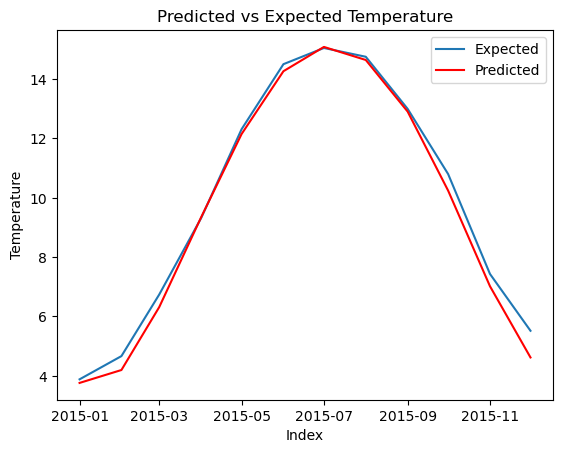

In [111]:
# Make predictions using the fitted model
predictions = sarima_fit.predict(start=len(Train), end=len(Train)+len(Test)-1, dynamic=False).values

# Print predicted and expected values
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], Test.iloc[i]))

# Plot predictions vs expected
plt.plot(Test.index, Test, label='Expected')
plt.plot(Test.index, predictions, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Predicted vs Expected Temperature')
plt.legend();

In [112]:
# Calculate metrics for the predictions
metrics = calculate_metrics(Test, predictions)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['SARIMA'] = metrics_df.values[0]

In [113]:
results

,RMSE,MAE,MAPE (%)
Model,,,
Naive,6.353953,5.173500,44.303238
Seasonal Naive,0.493890,0.386667,5.779383
Mean,4.208256,3.730714,42.804960
Drift,6.350677,5.170073,44.268544
Autoregression,0.520730,0.441500,6.296515
AR+MA,0.439374,0.371550,4.992116
ARIMA,0.374216,0.310455,4.000755
SARIMA,0.388621,0.295755,4.286307


### Holt-Winters Seasonal Model 
The Holt-Winters Seasonal Model, also known as __Triple Exponential Smoothing__, is a time series forecasting method that extends the Holt's linear exponential smoothing method to handle seasonality in the data. It decomposes the time series into three components: __level, trend, and seasonal,__ and then forecasts future values by combining these components.

__Components of Holt-Winters Model:__
- Level (L): Represents the average value of the series over time. Updated using the previous level and the error correction term.
- Trend (T): Represents the rate of change of the series over time. Captures the slope or direction of the trend component.
- Seasonal (S): Represents the periodic fluctuations or seasonality in the data. Captures the repeating patterns at fixed intervals, such as daily, weekly, or yearly.

__Seasonal Decomposition:__
- The Holt-Winters Seasonal Model decomposes the time series into these three components using either additive or multiplicative decomposition. 
- Additive decomposition: assumes that the magnitude of seasonality remains constant over time.
- Multiplicative decomposition assumes that the magnitude of seasonality changes proportionally with the level of the series.

__Forecasting Process:__
1. Initialization: Initialize the level, trend, and seasonal components using simple methods such as averaging or linear regression.
2. Update Equations:__
- Update the level, trend, and seasonal components using exponential smoothing equations.
- The level is updated using a combination of the previous level and the error correction term.
- The trend is updated using a combination of the previous trend and the trend correction term.
- The seasonal component is updated using a combination of the previous seasonal component and the seasonal correction term.
3. Forecasting:
- The forecasted value is the sum (for additive decomposition) or the product (for multiplicative decomposition) of the level, trend, and seasonal components.


__Model Parameters (α, β, γ, m):__
- α, 𝛽, and 𝛾 are smoothing parameters controlling the weights assigned to the current observation, trend, and seasonal components, respectively.
- These parameters are typically chosen through optimization techniques such as grid search or cross-validation.
- Seasonal Period (m): Specifies the length of the seasonal cycle in the data. This parameter needs to be determined based on domain knowledge or through exploratory data analysis.

__Advantages:__
- Accurate forecasting of time series data with trend and seasonality.
- Adaptability to changes in the data over time.
- Interpretability of the model parameters, providing insights into underlying patterns.

__Limitations:__
- Assumes that the data is stationary or can be made stationary through differencing.
- Complexity in tuning model parameters and selecting the appropriate seasonal period.

In summary, the Holt-Winters Seasonal Model is a powerful method for time series forecasting, capable of capturing trend and seasonality in the data. By decomposing the time series into level, trend, and seasonal components, and then combining these components for forecasting, the model provides accurate forecasts and valuable insights into time series data.

predicted=3.674116, expected=3.881000
predicted=4.196408, expected=4.664000
predicted=6.307479, expected=6.740000
predicted=9.403990, expected=9.313000
predicted=12.221729, expected=12.312000
predicted=14.360003, expected=14.505000
predicted=15.226567, expected=15.051000
predicted=14.766107, expected=14.755000
predicted=12.975346, expected=12.999000
predicted=10.313955, expected=10.801000
predicted=7.041578, expected=7.433000
predicted=4.645706, expected=5.518000


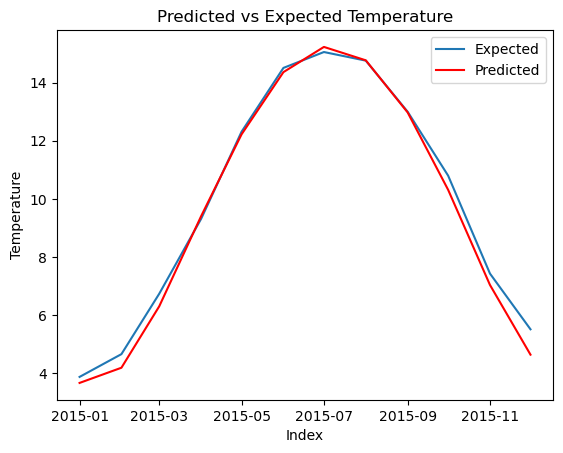

In [115]:
# Fix the seed for randomness
seed = 42
np.random.seed(seed)

# Fit Holt-Winters Seasonal Model
holt_winters_model = ExponentialSmoothing(
    Train,
    seasonal_periods=12,
    trend='add',        # 'add' for additive trend, can be 'mul' for multiplicative
    seasonal='add'      # 'add' for additive seasonality, can be 'mul' for multiplicative
).fit()

# Make predictions using the fitted model
predictions = holt_winters_model.forecast(len(Test))

# Print predicted and expected values
for i in range(len(predictions)):
    print(f'predicted={predictions.iloc[i]:.6f}, expected={Test.iloc[i]:.6f}')

# Plot predictions vs expected
plt.plot(Test.index, Test, label='Expected')
plt.plot(Test.index, predictions, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Predicted vs Expected Temperature')
plt.legend()
plt.show()

In [116]:
# Calculate metrics for the predictions
metrics = calculate_metrics(Test, predictions)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Holt_Winters'] = metrics_df.values[0]

In [117]:
results

,RMSE,MAE,MAPE (%)
Model,,,
Naive,6.353953,5.173500,44.303238
Seasonal Naive,0.493890,0.386667,5.779383
Mean,4.208256,3.730714,42.804960
Drift,6.350677,5.170073,44.268544
Autoregression,0.520730,0.441500,6.296515
AR+MA,0.439374,0.371550,4.992116
ARIMA,0.374216,0.310455,4.000755
SARIMA,0.388621,0.295755,4.286307
Holt_Winters,0.372916,0.282862,4.290872
